In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py

from common import hallmark as hm
from common import viz
from common import dalt
from common import mockservation as ms

In [2]:
pf = hm.ParaFrame(
    'cache/Illinois_thermal_w{window:d}/{mag}a{aspin:g}_i{inc:d}/gt_Rh{Rhigh:d}_{freq}.h5'
)

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

mag ['M' 'S']
aspin [-0.94 -0.5   0.    0.5   0.94]
Rhigh [  1  10  40 160]
window [3 4 5]
freq ['230GHz' '2um' '86GHz']
inc [ 10  30  50  70  90 110 130 150 170]


In [3]:
sel = pf(window=5)(mag='S')(aspin=0.94)(inc=50)(Rhigh=10)(freq='230GHz')
display(sel)

,path,window,mag,aspin,inc,Rhigh,freq
2880,cache/Illinois_thermal_w5/Sa+0.94_i50/gt_Rh10_...,5,S,0.94,50,10,230GHz


In [4]:
def load(f):
    with h5py.File(f) as h:
        m    = h['meta']
        meta = dalt.ImageMeta(**{k:m[k][()] for k in m.keys()})
        data = h['data'][:]
    return dalt.Image(data, meta=meta)
        
mov = load(sel.path.iloc[0])

<AxesSubplot:xlabel='Relative R.A. [$\\mathrm{\\mu as}$]', ylabel='Relative Declination [$\\mathrm{\\mu as}$]'>

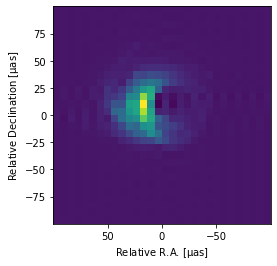

In [5]:
viz.show(mov, s=0)

In [6]:
vis = ms.mockserve(mov, N=256)

<AxesSubplot:xlabel='u [G$\\lambda$]', ylabel='v [G$\\lambda$]'>

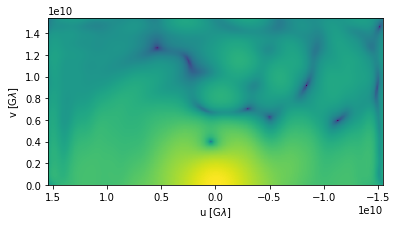

In [7]:
def f(v):
    return np.log(abs(v).value)

viz.show(vis, s=0, f=f)

(1000, 256, 129)


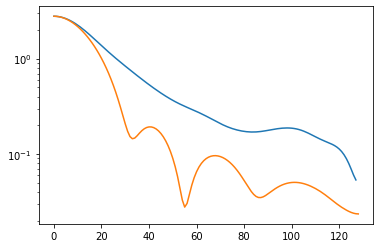

In [8]:
from matplotlib import pyplot as plt

print(vis.shape)

plt.semilogy(abs(vis[0,128:,0]))
plt.semilogy(abs(vis[0,128,:]))